In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

daten_squad_merge = pd.read_csv("daten_squad_merge.csv")
daten_squad_merge.head()

,name,positions,age,height,weight,nationality,team,year,team_placement
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


## 1 Feature Engineer

In [2]:
# Zielvariablen
daten_squad_merge.team_placement.unique()



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

**1.1. Es gibt zu viele Ziel Variablen für zu wenigen Daten**

**1.2. Die ZielVariable werden in 3 Gruppen verteilt.**

In [3]:
## Zielvariablen Gruppen, 1-5 ->0 , 6-17->1, 18-20 ->2 
daten_squad_merge['team_placement_2'] = pd.cut(daten_squad_merge.team_placement,
                                                     [1,5,17,20],include_lowest=True,labels=False)
daten_squad_merge.head(10)

,name,positions,age,height,weight,nationality,team,year,team_placement,team_placement_2
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0
5,Ashley Cole3,D,40.0,1.75,66.0,Inglaterra,arsenal,2003,1,0
6,Lauren12,D,44.0,1.80,71.0,Camarões,arsenal,2003,1,0
7,Pascal Cygan18,D,47.0,1.93,84.0,França,arsenal,2003,1,0
8,Philippe Senderos20,D,36.0,1.91,83.0,Suíça,arsenal,2003,1,0
9,Gaël Clichy22,D,36.0,1.75,63.0,França,arsenal,2003,1,0


In [4]:
## valiedirung ob die neu Variable richtig ist
daten_squad_merge.groupby(['team_placement','team_placement_2']).year.count()

team_placement  team_placement_2
1               0                   626
2               0                   641
3               0                   666
4               0                   677
5               0                   622
6               1                   576
7               1                   599
8               1                   611
9               1                   584
10              1                   567
11              1                   614
12              1                   615
13              1                   565
14              1                   572
15              1                   612
16              1                   584
17              1                   570
18              2                   586
19              2                   566
20              2                   594
Name: year, dtype: int64

**1.3 Eine neu Variable nationality wird in der Datenset für das Modell eingefügt. Das Feld hat den Werte zwische 0 und 1**

In [5]:
## FLAG ob der Spieler Englander ist oder nicht bereich 
daten_squad_merge.loc[:,'auslaender'] = daten_squad_merge.nationality.apply(lambda x: 1 if x != 'Inglaterra' else 0 ) 
daten_squad_merge.head()

,name,positions,age,height,weight,nationality,team,year,team_placement,team_placement_2,auslaender
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0,0


**1.4  Median von den neuen Spalten mit der neuen Variable team_placement_2 berechen**

In [6]:
## Median von den neuen Spalten mit der neue Variable team_placement_2 

median_klassifikation_team = daten_squad_merge.groupby(['year','team_placement_2']).agg({'height':'mean','weight':'mean','age':'mean'}).reset_index()
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age
0,2003,0,1.818743,76.018072,40.976190
1,2003,1,1.821686,77.077151,42.373178
2,2003,2,1.812329,76.712329,42.301370
3,2004,0,1.828354,77.558282,40.067485
4,2004,1,1.822275,77.241791,41.632836


**1.5 Berechnung Spielersumme pro Positionen in der Tabelle und Jahr**

In [7]:
## Spielersumme pro Positionen in der Tabelle
qtd_spieler_position = daten_squad_merge.groupby(['year','team_placement_2']).name.count().reset_index().rename(columns={'name':'summe_spieler'})
qtd_spieler_position.head()

,year,team_placement_2,summe_spieler
0,2003,0,168
1,2003,1,343
2,2003,2,73
3,2004,0,166
4,2004,1,340


**1.6 Die Durchschnitt der Spieler pro Rangposition in der Tabelle und Saison zu berechnen**

In [8]:
## Anzahl Spieler in jeden Team pro Positionen in der Tabelle
qtd_spieler_position = ( daten_squad_merge.groupby(['year','team_placement_2'])
                          .agg({'name':"count", 'team':'nunique'})
                          .reset_index().rename(columns={'name':'spieleranzahl'}))

qtd_spieler_position.head()

,year,team_placement_2,spieleranzahl,team
0,2003,0,168,5
1,2003,1,343,12
2,2003,2,73,3
3,2004,0,166,5
4,2004,1,340,12


In [9]:
## EXECUTAR NO OUTRO MOMENTO 
##  Median der Spieler in jeder Positionen in der Tabelle und Saison
qtd_spieler_position.loc[:,'spieler_median'] = qtd_spieler_position.spieleranzahl / qtd_spieler_position.team
qtd_spieler_position.head()

,year,team_placement_2,spieleranzahl,team,spieler_median
0,2003,0,168,5,33.600000
1,2003,1,343,12,28.583333
2,2003,2,73,3,24.333333
3,2004,0,166,5,33.200000
4,2004,1,340,12,28.333333


**1.7 Prozentsatz von auslädichen Spieler pro Position in der Tabelle und Jahr**

In [10]:
## CALCULANDO A PORCENTAGEM DE ESTRANGEIRO PARA CADA POSIÇÃO DA CLASSIFICAÇÃO 
## von der ersten 5 teams in 2003 63.095238 % sind Äuslander
perct_auslaender = daten_squad_merge.groupby(['year','team_placement_2']).auslaender.value_counts(normalize=True)*100
perct_auslaender

year  team_placement_2  auslaender
2003  0                 1             63.095238
                        0             36.904762
      1                 1             54.810496
                        0             45.189504
      2                 0             52.054795
                                        ...    
2021  0                 0             37.974684
      1                 1             56.250000
                        0             43.750000
      2                 1             59.756098
                        0             40.243902
Name: auslaender, Length: 114, dtype: float64

In [11]:
perct_auslaender = pd.DataFrame(perct_auslaender)
perct_auslaender .head(6)

auslaender
year team_placement_2 auslaender            
2003 0                1            63.095238
                      0            36.904762
     1                1            54.810496
                      0            45.189504
     2                0            52.054795
                      1            47.945205

In [12]:
## rename von der Spalte
perct_auslaender = perct_auslaender.rename(columns={'auslaender':'auslaender_prozent'} )
perct_auslaender.head(6)

auslaender_prozent
year team_placement_2 auslaender                    
2003 0                1                    63.095238
                      0                    36.904762
     1                1                    54.810496
                      0                    45.189504
     2                0                    52.054795
                      1                    47.945205

In [13]:
## index werden zum Spalten 
perct_auslaender = perct_auslaender.reset_index()
perct_auslaender.head()

,year,team_placement_2,auslaender,auslaender_prozent
0,2003,0,1,63.095238
1,2003,0,0,36.904762
2,2003,1,1,54.810496
3,2003,1,0,45.189504
4,2003,2,0,52.054795


**1.8 Filter für die Tabelle nach nur die Ausländerspieler**

In [14]:
## Filter die Tabelle nach nur die Ausländer
perct_auslaender = perct_auslaender.query("auslaender == 1")
perct_auslaender.head()

,year,team_placement_2,auslaender,auslaender_prozent
0,2003,0,1,63.095238
2,2003,1,1,54.810496
5,2003,2,1,47.945205
6,2004,0,1,65.662651
8,2004,1,1,56.176471


In [15]:
## zusammenfügen
median_klassifikation_team = pd.concat([median_klassifikation_team,qtd_spieler_position,perct_auslaender],axis=1,join='inner')
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,year,team_placement_2,spieleranzahl,team,spieler_median,year,team_placement_2,auslaender,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,2003,0,168,5,33.600000,2003,0,1,63.095238
2,2003,2,1.812329,76.712329,42.301370,2003,2,73,3,24.333333,2003,1,1,54.810496
5,2004,2,1.820952,76.904762,41.602410,2004,2,84,3,28.000000,2003,2,1,47.945205
6,2005,0,1.827250,76.925000,39.031250,2005,0,160,5,32.000000,2004,0,1,65.662651
8,2005,2,1.824366,77.070423,39.295775,2005,2,71,3,23.666667,2004,1,1,56.176471


In [16]:
## Löschen Doppelt Spalten
median_klassifikation_team = median_klassifikation_team.loc[:,~median_klassifikation_team.columns.duplicated()]
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,spieleranzahl,team,spieler_median,auslaender,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,168,5,33.600000,1,63.095238
2,2003,2,1.812329,76.712329,42.301370,73,3,24.333333,1,54.810496
5,2004,2,1.820952,76.904762,41.602410,84,3,28.000000,1,47.945205
6,2005,0,1.827250,76.925000,39.031250,160,5,32.000000,1,65.662651
8,2005,2,1.824366,77.070423,39.295775,71,3,23.666667,1,56.176471


In [17]:
## Löschen von Spalten die nicht gebrauch werden
median_klassifikation_team = median_klassifikation_team.drop(columns=['auslaender','team'])

#median_klassifikation_team =median_klassifikation_team.drop(columns=['auslaender','qtd_jogadores','taem'])
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,spieleranzahl,spieler_median,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,168,33.600000,63.095238
2,2003,2,1.812329,76.712329,42.301370,73,24.333333,54.810496
5,2004,2,1.820952,76.904762,41.602410,84,28.000000,47.945205
6,2005,0,1.827250,76.925000,39.031250,160,32.000000,65.662651
8,2005,2,1.824366,77.070423,39.295775,71,23.666667,56.176471


In [18]:
## datei  Speichern
median_klassifikation_team.to_csv("median_klassifikation_team_v2.csv",index=False)

### 2. Explorativ Daten Analyse

In [35]:
# null Wert durchsuchen
(median_klassifikation_team.isna().sum()/len(median_klassifikation_team)*100).sort_values(ascending=False)

year                  0.0
team_placement_2      0.0
height                0.0
weight                0.0
age                   0.0
spieleranzahl         0.0
auslaender_prozent    0.0
dtype: float64

<AxesSubplot:>

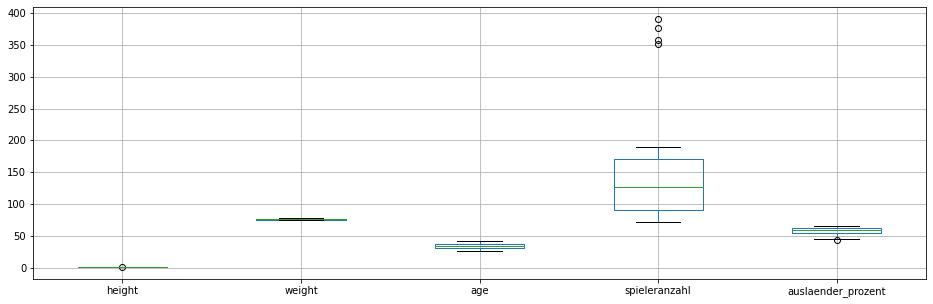

In [36]:
median_klassifikation_team.drop(columns=['team_placement_2','year']).boxplot(figsize=(16,5))

**2.1 Boxplot**

- Die Median von den unabhängigen Variabel zeigen eine große Variation in Bezug auf die Ziel Variable.  
- Bessonders die Variable auslaender_prozent.
- Die Variable hat eine negativ Relation, je die Klassizirung niedriger ist in der Tabelle , desto weniger Spieler aus der Ausland spielen in der Mannschfat

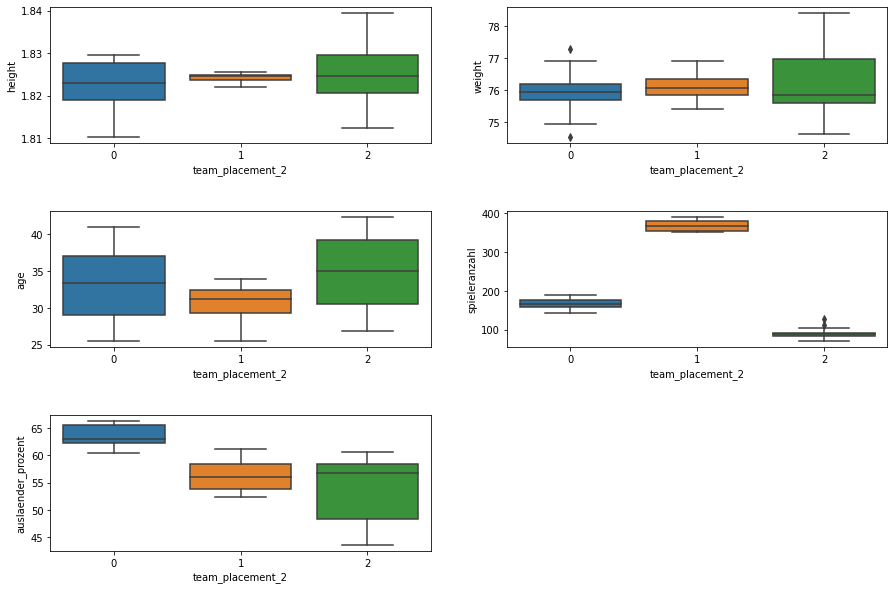

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=.5, wspace=0.2)
i = 1
for j,c in enumerate(median_klassifikation_team.columns): #['VL_FLX_VNCT','VL_VNCT','VL_FATM','IN_TRNS_TITD']):
  if c not in ['team_placement_2','year','team']:
      ax = fig.add_subplot(3, 2, i)
      sns.boxplot(x='team_placement_2',y=c,data=median_klassifikation_team)
      i += 1

**2.2**

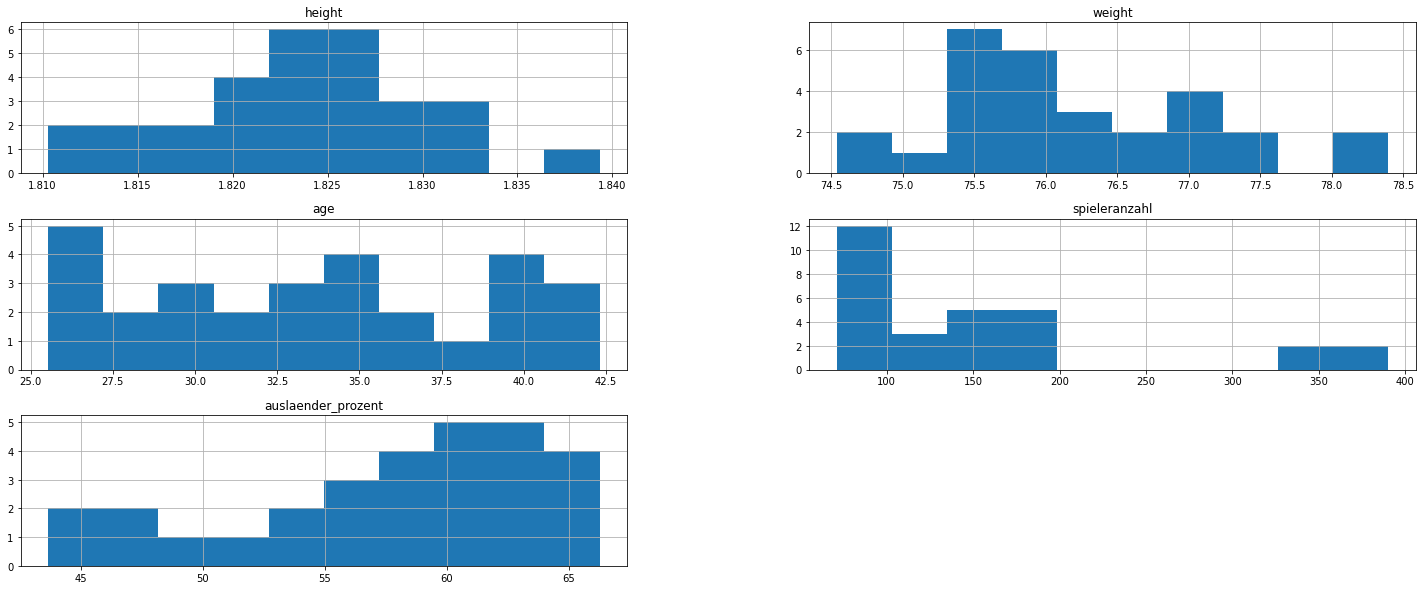

In [47]:
median_klassifikation_team.drop(columns=['year','team_placement_2']).hist(figsize=(25,10))
plt.show()

**2.3 Pairplot**
- Bei der Grafik  auslaender_prozent x team_placement_2  bestätig sich 
die Tendenz zwischen Plazierung in der Liga und Anzahl der Ausländer in der Kader.

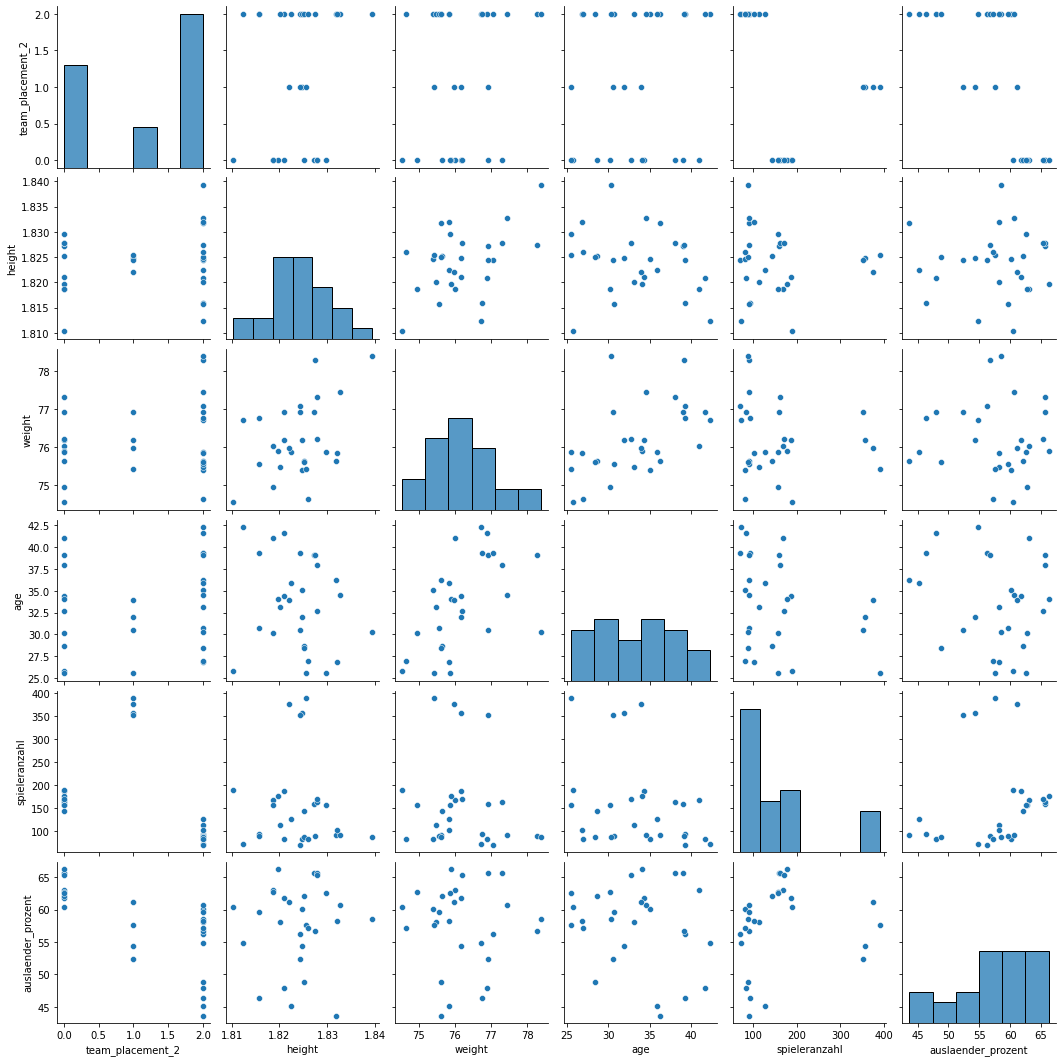

In [48]:
## Grafik zwischen die Features
sns.pairplot(median_klassifikation_team.drop(columns=['year']) )
#pd.plotting.scatter_matrix(media_classificacao_time.drop(columns=['ano']), figsize=(20,15))
plt.show()

**2.4 Pairplo**
- Die Grafik Spieleranzahl ist in 3 Gruppen geteilt abhängige  von der Platzierung in der Tabelle.
- Diese Gruppierung ist sehr Hilfereich für eine klassifikationsalgorithmen
- Die Variable age hat keine Einfluss auf der Plazierung der Mannschfat

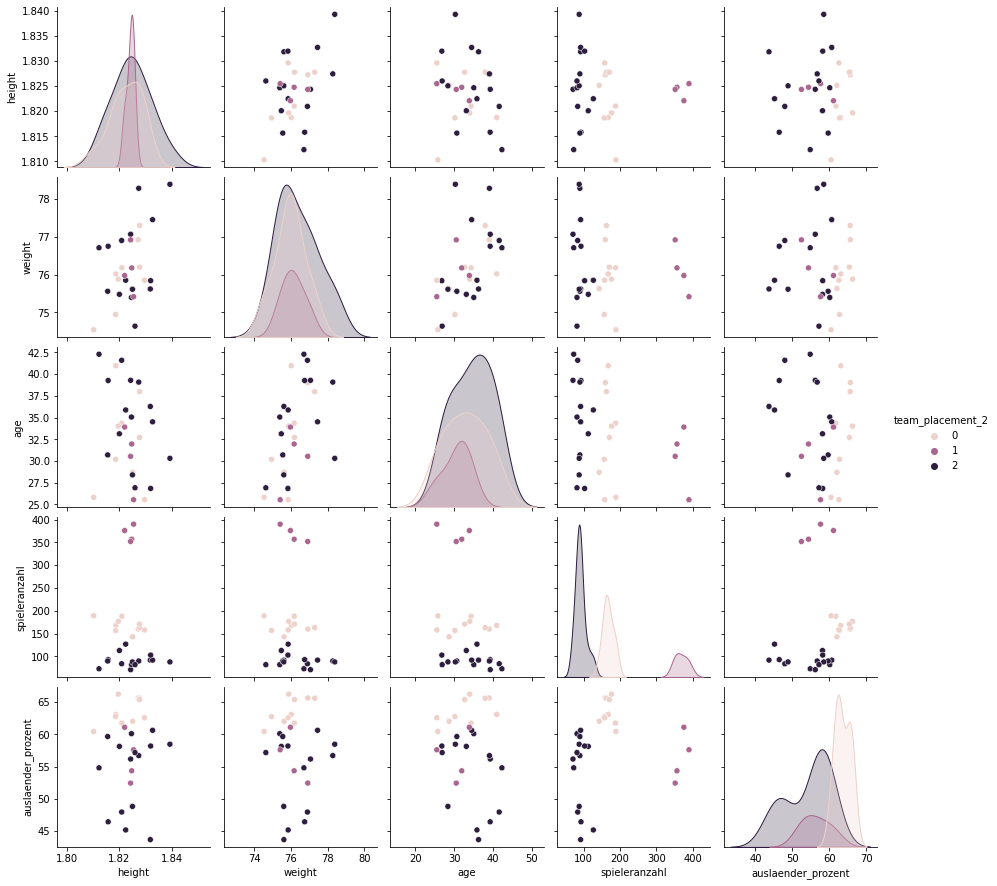

In [50]:
## Grafik zwischen die Features
sns.pairplot(median_klassifikation_team.drop(columns=['year']),hue='team_placement_2' )
#pd.plotting.scatter_matrix(media_classificacao_time.drop(columns=['ano']), figsize=(20,15))
plt.show()

**2.5 Heatmap**
-  Es gibt einen starke negative Korrelation zwischen zwischen team_placement_2	und spieleranzahl und zwischen team_placement_2 und auslaender_prozent.




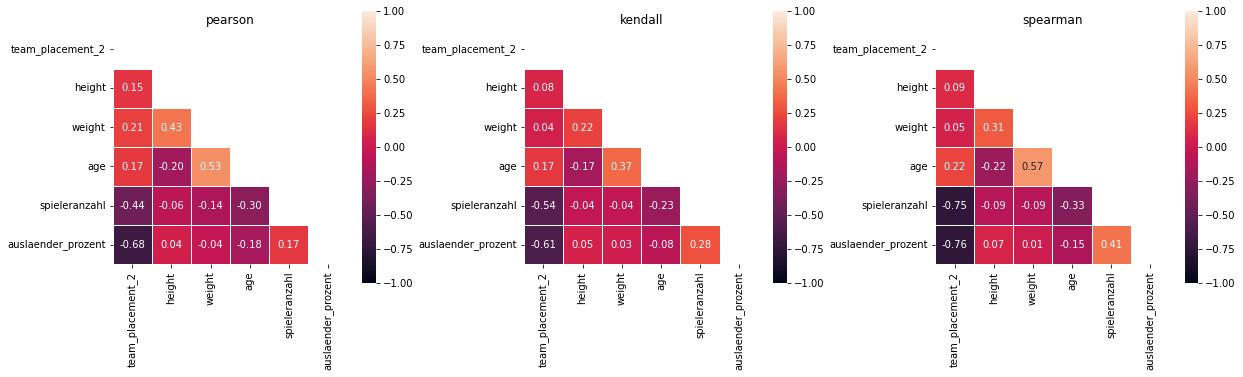

In [55]:
## GRÁFICO PARA ANALISAR OS COEFICIENTES DE CORRELAÇÃO ENTRE AS VARIÁVEIS
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.4)

corr     = median_klassifikation_team.drop(columns=['year']).corr()
kendall  = median_klassifikation_team.drop(columns=['year']).corr('kendall')
spearman = median_klassifikation_team.drop(columns=['year']).corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 45)
#axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 45)
#axs[2].set_xticklabels(axs[2].get_xticks(), rotation = 45)

plt.show()